<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Assignment%2011%20-%20Model%20Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

In [0]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [4]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


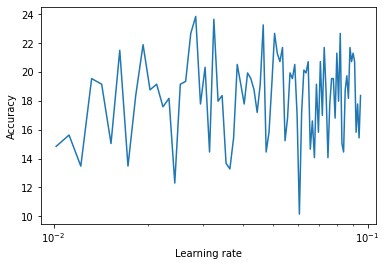

28    0.028355
Name: lr, dtype: float64

In [9]:
lr_max = LR_Max(net,1e-4,0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min

No. of Iterations per epoch : 100(50000/512)    
10 epochs: 1000 iterations

In [10]:
lr_min =  LR_Min(lr_max,net)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.7017288208007812 Batch_id=97 Accuracy=26.87: 100%|██████████| 98/98 [00:39<00:00,  2.49it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5669, Accuracy: 4163/10000 (41.63%)

EPOCH: 1


Loss=1.4966926574707031 Batch_id=97 Accuracy=43.65: 100%|██████████| 98/98 [00:39<00:00,  2.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2604, Accuracy: 5441/10000 (54.41%)

EPOCH: 2


Loss=1.318247675895691 Batch_id=97 Accuracy=50.32: 100%|██████████| 98/98 [00:40<00:00,  2.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0974, Accuracy: 6087/10000 (60.87%)

EPOCH: 3


Loss=1.1904233694076538 Batch_id=97 Accuracy=56.02: 100%|██████████| 98/98 [00:39<00:00,  2.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1850, Accuracy: 5940/10000 (59.40%)

EPOCH: 4


Loss=1.1882493495941162 Batch_id=97 Accuracy=59.88: 100%|██████████| 98/98 [00:39<00:00,  2.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8159, Accuracy: 7116/10000 (71.16%)

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8140, Accuracy: 7190/10000 (71.90%)

EPOCH: 6


Loss=0.8700929284095764 Batch_id=97 Accuracy=65.44: 100%|██████████| 98/98 [00:39<00:00,  2.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7573, Accuracy: 7330/10000 (73.30%)

EPOCH: 7


Loss=0.902567446231842 Batch_id=97 Accuracy=67.53: 100%|██████████| 98/98 [00:40<00:00,  2.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7120, Accuracy: 7599/10000 (75.99%)

EPOCH: 8


Loss=0.847612738609314 Batch_id=97 Accuracy=68.48: 100%|██████████| 98/98 [00:39<00:00,  2.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6492, Accuracy: 7798/10000 (77.98%)

EPOCH: 9


Loss=0.9055202007293701 Batch_id=97 Accuracy=70.31: 100%|██████████| 98/98 [00:39<00:00,  2.45it/s]



Test set: Average loss: 0.6559, Accuracy: 7748/10000 (77.48%)



UnboundLocalError: ignored